# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

54

In [16]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [17]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [23]:
# сформируем сводную по количеству детей и проценту просрочек по кредитам

loan_return_children = pd.pivot_table(data, index = 'children', columns = 'debt', values='gender', aggfunc = 'count', margins = True)
loan_return_children['debt%'] = loan_return_children[1] / loan_return_children['All'] * 100
loan_return_children


debt,0,1,All,debt%
children,,,,
0,13044.0,1063.0,14107,7.535266
1,4365.0,444.0,4809,9.232689
2,1858.0,194.0,2052,9.454191
3,303.0,27.0,330,8.181818
4,37.0,4.0,41,9.756098
5,9.0,NaN,9,NaN
All,19616.0,1732.0,21348,8.113172


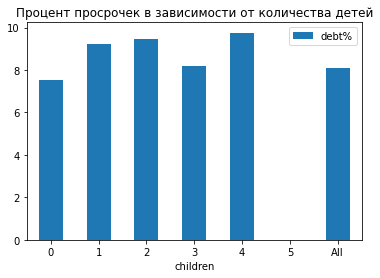

In [24]:
# визуализируем на графике
loan_return_children.plot(title= 'Процент просрочек в зависимости от количества детей' , y = 'debt%', kind='bar', rot=0, stacked=True);

**Вывод:** 
- Заемщики без детей имеют наименьший процент просрочек - `7,5%`
- Заемщики с 1 либо 2 детьми в целом демонстрируют повышенный процент просрочек, `9,2%` и `9,5%` соответственно
- Заемщики с 3мя детьми выделяются на фоне тех, у кого 1-2 ребенка и демонстрируют меньший процент просрочек `8,2%`
- Заемщики с 4ми я 5ю детьми редко встречаются в выборке (37 и 9 случаев соответственно), сделать надежные выводы на имеющейся статистике не представляется возможным

Таким образом можно сделать вывод, что зависимость между количеством детей и вероятностью просрочки по кредиту есть, заемщики с детьми имеют в целом более высокий процент просрочек

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [25]:
# сформируем сводную по семейному положению и проценту просрочек по кредитам

loan_return_family_status = pd.pivot_table(data, index = 'family_status', columns = 'debt', values='gender', aggfunc = 'count') 
loan_return_family_status['debt%'] = \
    loan_return_family_status[1] / (loan_return_family_status[0]+ loan_return_family_status[1]) * 100

# сортируем таблицу по убыванию процентов невозврата
loan_return_family_status = loan_return_family_status.sort_values('debt%', ascending=False)
loan_return_family_status

debt,0,1,debt%
family_status,,,
Не женат / не замужем,2523,273,9.763948
гражданский брак,3761,385,9.286059
женат / замужем,11339,927,7.557476
в разводе,1105,84,7.064760
вдовец / вдова,888,63,6.624606


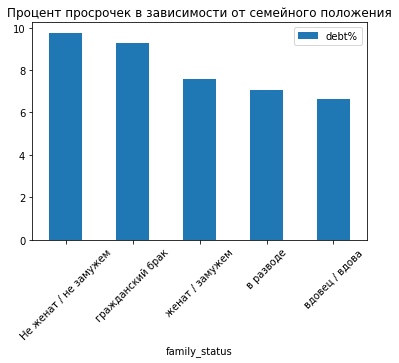

In [26]:
# визуализируем на графике
loan_return_family_status.plot(title= 'Процент просрочек в зависимости от семейного положения' , y = 'debt%', kind='bar', rot=45, stacked=True);

**Вывод:** 

Просматривается сильная зависимость между семейным положением и процентом просрочек. Наибольший процент просрочек `9,8%` демонстрируют не женатые/не замужние заемщики, тогда как люди в статусе вдовец/вдова допускаю просрочки в `6,6%` случаев

Семейное положение - важный параметр, от которого зависит вероятность просрочки в погашении.

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [27]:
# сформируем сводную по уровню  и проценту просрочек по кредитам

loan_return_total_income_category = pd.pivot_table(data, index = 'total_income_category', columns = 'debt', values='gender', aggfunc = 'count') 
loan_return_total_income_category['debt%'] = \
    loan_return_total_income_category[1] / (loan_return_total_income_category[0]+ loan_return_total_income_category[1]) * 100

loan_return_total_income_category

debt,0,1,debt%
total_income_category,,,
A,23,2,8.000000
B,4660,354,7.060231
C,14585,1353,8.489145
D,328,21,6.017192
E,20,2,9.090909


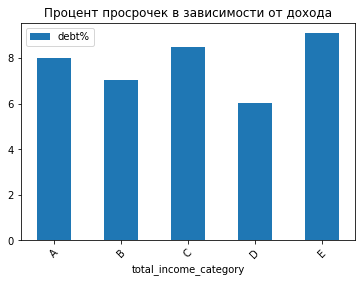

In [28]:
# визуализируем на графике
loan_return_total_income_category.plot(title= 'Процент просрочек в зависимости от дохода' , y = 'debt%', kind='bar', rot=45, stacked=True);

**Вывод:** 
- Заемщики с минимальной (0–30000 — 'E') и максимальной (1000001 и выше — 'A') категорией дохода встречаются в выборке редко, потому сделать по ним однозначный вывод на основании имеющихся данных не представляется возможным
- Заемщики средней категории (50001–200000 — 'C') дохода чаще всего допускают просрочки, в `8,5%` случаев
- Заемщики с категориями дохода 'В' (200001–1000000) и 'D' (30001–50000) в целом лучше выполнют обызательства и допускают просрочки в `7,1%` и `6%` соответственно

Зависимость между уровнем дохода и возвратом кредита в срок заметна, особенно плохо возвращают кредиты заемщики в средней категории дохода 'C'. Заемщики категории 'D' являются самыми надежными

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

In [29]:
# сформируем сводную по целям кредита и проценту просрочек по кредитам

loan_return_purpose_category = pd.pivot_table(data, index = 'purpose_category', columns = 'debt', values='gender', aggfunc = 'count', margins = False)
loan_return_purpose_category['debt%'] = \
    loan_return_purpose_category[1] / (loan_return_purpose_category[0]+ loan_return_purpose_category[1]) * 100

# сортируем таблицу по убыванию процентов невозврата
loan_return_purpose_category = loan_return_purpose_category.sort_values('debt%', ascending=False)
loan_return_purpose_category

debt,0,1,debt%
purpose_category,,,
операции с автомобилем,3881,400,9.343611
получение образования,3620,369,9.250439
проведение свадьбы,2141,183,7.874355
операции с недвижимостью,9974,780,7.253115


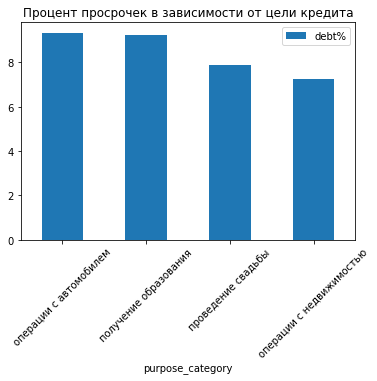

In [30]:
# визуализируем на графике
loan_return_purpose_category.plot(title= 'Процент просрочек в зависимости от цели кредита' , y = 'debt%', kind='bar', rot=45, stacked=True);

**Вывод:** 

- Наибольший процент просрочек наблюдается по кредитам на операции с автомобилем и получение образования - по `9,3%`
- Проведение свадьбы и операции с недвижимостью в целом отличаются меньшим процентом просрочек - `7,9%` и `7,3%` соответственно


**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:*  
- опциональный характер предоставления определенных данных пользователем, многие могут не захотеть внести те или иные данные
- всевозможные сбои в системе, например: данные не сохранились, данные не передались, форма ввода забагована и т.д.
- одни данные зависят от других, и пропуски могут быть вполне ожидаемыми. например, у человека пропуск в графе с доходами может быть по причине статуса 'безработный'
- 'человеческий фактор' при подготовке данных. съехала ячейка в Excel, случайно стерли значения и т.д.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* 

В случае заполнения медианными данными мы не меняем медиану для всей выборки. Опять же важно, чтобы количество пропусков не составляло большой процент от всей совокупности, иначе будет переизбыток значений в средней части распределения, что может привести к некорректным выводам.

## Общий вывод.

Подводя итоги, можно выделить следующие зависимости:

### Количество детей 
Заемщики без детей демонстрируют наибольшую надежность и допускают просрочки только в `7,5%` случаев. Заемщики с 1-2 детьми наоборот - наименее надежные, просрочки доходят до `9,5%` случаев. Однако, уже с 3мя детьми ситуация улучшается, процент просрочек снижается до `8,2%`. Проверить устойчивость тенденции для заемщиков с 4 и более детьми не представляется возможным, так как в выборке нет достаточной статистики по таким случаям.

<font style="background-color:aquamarine">&nbsp; нет детей &nbsp;</font> < <font style="background-color:pink"> &nbsp; есть дети &nbsp;</font> 
 

### Семейное положение
Не женатые/не замужние заемщики и заемщики в статусе гражданского брака - наименее надежные, по ним просрочки наблюдаются до `9,8%` случаев. Наличие семьи характеризует заемщика как более надежного, люди со статусом женат/за мужем допускают просрочки в `7,6%` случаев. Заемщики в разводе еще реже допускают просрочки - в `7,1%` случаев. Наиболее надежные - в статусе вдовец/вдова с долей просрочки `6,6%`

<font style="background-color:aquamarine">&nbsp; состоят/были в браке &nbsp; </font> < <font style="background-color:pink"> &nbsp; холостые &nbsp;</font> 

### Величина дохода
Зависимость между уровнем дохода и возвратом кредита в срок заметна, особенно плохо возвращают кредиты заемщики в средней категории дохода 'C'(доход 50001–200000), просрочки `8,5%`. Заемщики в группе 'B'(200001–1000000) имеют меньшую статистику просрочек - `7,1%`. Самые надежные - заемщики категории 'D'(30001–50000), у них просрочки на уровне `6%`. 
По двум категориям дохода - наименьшей 'Е'(0–30000) и наибольшей 'A' (1000001 и выше) закономерность выявить не удалось из-за недостаточного количества случаев в имеющейся выборке.

<font style="background-color:aquamarine">&nbsp; ниже среднего 'D' &nbsp;</font> < <font style="background-color:pink">&nbsp; средний 'C' &nbsp;</font> > <font style="background-color:aquamarine">&nbsp; выше среднего 'B'  &nbsp;</font> 

### Цель кредита
Самые рисковые цели для выдачи кредитов - операции с автомобилем либо получение образования - просрочки доходят до `9,3%`. Кредиты на свадьбу в целом выплачиваются исправнее - просрочка есть в `7,9%` случаев. И наибольшая стабильность выплат наблюдается по операциям с недвижимостью - просрочки составляют `7,3%`

<font style="background-color:aquamarine">&nbsp; недвижимость/свадьба &nbsp; </font> < <font style="background-color:pink">&nbsp; автомобиль/образование &nbsp;</font> 

 
# Вывод #

На основании проведенного исследования можно сделать общий вывод, что вероятность наступления просрочки по кредиту зависит от многих факторов - количества детей, дохода, семейного положения и даже целям кредита. 

Все эти факторы являются необходимыми параметрами в системе кредитного скоринга.